ValueError: x and y must have same first dimension, but have shapes (18,) and (2, 18)

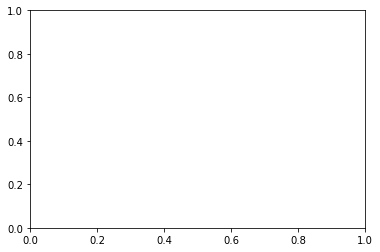

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import psutil
import time
import json

filename = 'memory_cpu_used.json'
data = {}
keyA = 'memory'
keyB = 'cpu'

for i in range(18):
    data.setdefault(i, {})
    data[i].setdefault(keyA, round((psutil.virtual_memory().used / (1024.0 ** 3)), 2))
    data[i].setdefault(keyB, psutil.cpu_percent(interval=1))
    time.sleep(0)
with open(filename, 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False)

with open(filename, 'r', encoding='utf-8') as f:
    x = np.arange(0, 170, 10)
    y = pd.read_json(filename)

    plt.plot(x, y, color='red', marker='o')

    plt.xticks(np.arange(0, 170, 10))
    plt.title('My PC Memory Used.')
    plt.xlabel('seconds')
    plt.ylabel('Used/GB')
    plt.grid(True)
    plt.show()